<a href="https://colab.research.google.com/github/dlskawns/coz-project/blob/main/3_CP2_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 추천 시스템 모델링

이번 프로젝트의 Phase 2는 추천 시스템 모델링을 합니다.  

추천시스템은 모바일 서비스와 웹 서비스에서 빼놓을 수 없는 마케팅 연관 중요한 포인트입니다. 이미 우리 주변에는 많은 추천 시스템이 함께하고 있는데요, 당장 모바일 어플리케이션을 켰을 때 나오는 첫 화면 또는 어떤 탭을 눌렀을 때 나오는 화면들 모두 추천시스템이 적용되어있다고 해도 과언이 아닙니다.

<br>

### 추천 시스템이 왜 존재할까요?

#### 1) 고객 편의성

추천 시스템은 기본적으로 '검색(retrieval)'을 기반으로 시작되었는데요, 고객의 검색에 따라 보여줄 컨텐츠 또는 상품을 '추천'해주기 시작하면서 발달 되었습니다. 점차 정보화시대가 되면서 보여줄 정보량이 많아지게 되어 좀 더 고객에게 편리한 서비스를 제공해 고객 경험을 증진 시키고자 본격적으로 발전하게 되었습니다.

<br>

<br>

#### 2) 고객 맞춤성 (개인화)

사실 위 1번과 같은 내용이지만, 조금 더 고객 맞춤형으로 진행되어야 할 필요성이 있습니다.  
정보기술산업이 발전함에 따라 모든 산업군에서 웹과 모바일 애플리케이션을 활용한 서비스 제공을 하고, 경쟁자가 많아지면서 고객이 계속 우리 서비스에 머물도록 만들기 위한 방법이 필요합니다. 추천시스템을 이용해 고객이 관심가질만한 정보를 제공, 고객의 '개인화'가 될 수록 개별 고객들은 더욱 우리 서비스를 이용하고, 상품이 있다면 구매를 할 것입니다.

<br>

<br>

위와 같은 이유 때문에 하루에도 수많은 경쟁자들이 생기며 변동성이 큰 이커머스 시장에서는 추천시스템이 무엇보다 중요하며,우리는 이러한 추천시스템을 통해 이커머스 데이터의 분석 결과에 따라 우리의 고객에게 필요한 추천시스템을 제공하는 것을 프로젝트의 두번째 목표로 둡니다.
 

## 추천 시스템의 종류

1. Association rule

2. Content Based Filtering(CB)

3. Collaborative Filtering(CF)
  * Memory Based
  * Latent Factor Based

4. Other Machine Learning
  * Factorization Machine(FM)
  * Multi Armed Bandit(MAB)

5. Deep Learning
  * General Model
    * Neural Collaborative Filtering(NCF)
    * Wide & Deep
    * DeepFM
    * Deep Cross Net(DCN)
  * Sequential Model
    * GRU4rec
    * Bert4rec
  * Graph Model
    * GNN
    * GCN


## 추천시스템 원리 

### 1) Content Based recommendation(CB)
컨텐츠(아이템)의 정보를 추출해 유사한 컨텐츠를 찾아 추천해주는 방식  
아주 단순한 방식이지만, 예전에는 유용하게 활용했습니다.

<br>
 
영화 추천을 해주는 상황을 생각해봅시다. 영화에 대한 정보(장르, 제작사, 감독, 출연배우 등)와 유저 선호(평점, 좋아요 등)이 있을 때, 유저가 선호한 영화와 비슷한 장르의 영화를 좋아할 수 있다는 것을 감안해 추천을 해주는 방식입니다.

||연도|장르|제작사|감독|주인공|
|:-:|:-:|:-:|:-:|:-:|:-:|
|아이언맨1|2010|SF|마블스튜디오|존파브로|로버트다우니주니어|
|어벤져스1|2012|슈퍼히어로|마블스튜디오|조스웨던|크리스에반스|
|퍼스트어벤져|2011|슈퍼히어로|마블스튜디오|조존스톤|크리스에반스|
|집으로|2002|드라마|튜브픽쳐스|이정향|유승호|

예를 들어보면, '마블'사의 '아이언맨'을 좋아하는 사람은 같은 '마블'사의 '어벤져스'도 좋아할 것이라고 생각해 추천하는 방식으로 볼 수 있습니다. 또한 어벤져스와 퍼스트어벤져도 장르, 제작사, 주인공이 같기 때문에 함께 추천될 확률이 높은 영화로 볼 수 있습니다.  

반면, 연도와 장르, 제작사 등 모든 feature에서 관련이 없는 '집으로'라는 영화는 아이언맨과 비슷하지 않기 때문에 추천되지 않을 것입니다.

<br>

#### * CB의 원리

위 예시처럼 각 컨텐츠(아이템) 별 특징을 모아 벡터화 한 뒤, 컨텐츠(벡터) 간의 유사도를 측정해 비슷한 컨텐츠를 추천해주는 방식입니다. 다양한 도메인에서도 그 특징(feature)만 잘 이용하면 어떻게든 활용할 수 있는 단순하지만 효과적인 아이디어입니다.

<br>

#### * CB의 장점

* 특정 유저에 대해 추천해줄 때, 다른 유저의 정보가 필요치 않습니다.
* 아이템에 대한 Cold start 문제가 해결 될 수 있습니다.
* 인기가 낮은 아이템도 유사도 기반으로 비슷한 상품이 있다면 얼마든지 추천 대상이 될 수 있습니다.
* 추천의 설명력이 있다. 위 예시와 같이 설명을 통해 실효성에 대한 검증을 할 수 있습니다.

<br>

#### * CB의 단점

* 아이템의 적합한 Feature를 가공해야 사용 가능합니다.
  * 실제 위 예시와 같이 한글 데이터로는 활용이 어려워 벡터화를 시켜주어야 사용 가능합니다.
* 한가지 분야의 비슷한 상품들만 많이 나올 수 있습니다. 
  * 유사도를 기반으로 하기 때문에 계속해서 같은 분야/장르의 상품만 추천될 수 있습니다.
* 다른 유저의 데이터를 활용 불가능합니다.
  * 장점이면서도 단점입니다. 유저가 봤던 것(또는 호감을 표한 것) 안에서만 추천이 가능하기 때문에 다른 유저와의 결합을 활용을 못한다는 점이 아쉬운 단점입니다.







#### CB 활용 예시

In [ ]:
import pandas as pd
import warnings
# 경고 제거
warnings.filterwarnings("ignore")

# Content 기반 추천
# 데이터셋 만들기
df = pd.DataFrame({'영화제목': ['아이언맨1','어벤져스1','퍼스트어벤져','집으로','겟아웃','인셉션','인터스텔라','웰컴투동막골'],
                   '연도':[2010,2012,2011,2002,2017,2010,2014, 2005],
                   '장르': ['SF','슈퍼히어로','슈퍼히어로','드라마','공포','SF', 'SF','드라마'],
                   '제작사':['마블스튜디오','마블스튜디오','마블스튜디오','튜브픽처스','블럼하우스','신카피','신카피','필름있수다'],
                   '감독':['존파브로','조스웨던','조존스톤','이정향','조던필','놀란','놀란','박광현'],
                   '주인공':['로다쥬','에반스','에반스','유승호','칼루야','디카프리오','매튜','강혜정']}) 
# 데이터셋 확인
df

,영화제목,연도,장르,제작사,감독,주인공
0,아이언맨1,2010,SF,마블스튜디오,존파브로,로다쥬
1,어벤져스1,2012,슈퍼히어로,마블스튜디오,조스웨던,에반스
2,퍼스트어벤져,2011,슈퍼히어로,마블스튜디오,조존스톤,에반스
3,집으로,2002,드라마,튜브픽처스,이정향,유승호
4,겟아웃,2017,공포,블럼하우스,조던필,칼루야
5,인셉션,2010,SF,신카피,놀란,디카프리오
6,인터스텔라,2014,SF,신카피,놀란,매튜
7,웰컴투동막골,2005,드라마,필름있수다,박광현,강혜정


위와 같이 영화제목(아이템)에 대한 feature 데이터셋이 만들어졌습니다.  
이 상태에서 각 영화를 나타내는 vector는 각 특징의 조합으로 이루어집니다. 

일반적으로 content based에 대한 구현은 TF-IDF를 통해 Text feature를 활용한 방법을 이용하지만, 더 많은 특성들을 이용하면서 단순히 컬럼 별 인코딩을 통해 벡터화 하는 것으로 아이템 벡터를 대체합니다. 

In [ ]:
df['features'] = df['장르']+' ' + df['제작사']+' ' + df['감독']+' ' + df['주인공']+' '
df

,영화제목,연도,장르,제작사,감독,주인공,features
0,아이언맨1,2010,SF,마블스튜디오,존파브로,로다쥬,SF 마블스튜디오 존파브로 로다쥬
1,어벤져스1,2012,슈퍼히어로,마블스튜디오,조스웨던,에반스,슈퍼히어로 마블스튜디오 조스웨던 에반스
2,퍼스트어벤져,2011,슈퍼히어로,마블스튜디오,조존스톤,에반스,슈퍼히어로 마블스튜디오 조존스톤 에반스
3,집으로,2002,드라마,튜브픽처스,이정향,유승호,드라마 튜브픽처스 이정향 유승호
4,겟아웃,2017,공포,블럼하우스,조던필,칼루야,공포 블럼하우스 조던필 칼루야
5,인셉션,2010,SF,신카피,놀란,디카프리오,SF 신카피 놀란 디카프리오
6,인터스텔라,2014,SF,신카피,놀란,매튜,SF 신카피 놀란 매튜
7,웰컴투동막골,2005,드라마,필름있수다,박광현,강혜정,드라마 필름있수다 박광현 강혜정


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from category_encoders import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## 단어 빈도에 따른 벡터화 - CountVectorizer도 활용 가능합니다.
# cnt = CountVectorizer(min_df=1, ngram_range = (1,1))
# df_cnt = cnt.fit_transform(df['features'])
# pd.DataFrame(df_cnt.todense(), columns = cnt.get_feature_names())
# pd.DataFrame(cosine_similarity(df_cnt, df_cnt))

# 단어 빈도에 따른 벡터화 - TfidfVectorizer
tfidf = TfidfVectorizer()
df_tfidf = tfidf.fit_transform(df['features'])
df_tfidf = pd.DataFrame(df_tfidf.todense(), columns = tfidf.get_feature_names())

# Tfidf 후의 각 샘플(영화) 별 vector
df_tfidf

,sf,강혜정,공포,놀란,드라마,디카프리오,로다쥬,마블스튜디오,매튜,박광현,...,에반스,유승호,이정향,조던필,조스웨던,조존스톤,존파브로,칼루야,튜브픽처스,필름있수다
0,0.414370,0.000000,0.0,0.000000,0.000000,0.00000,0.572973,0.414370,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.572973,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.422655,0.00000,0.000000,...,0.489798,0.000000,0.000000,0.0,0.58443,0.00000,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.422655,0.00000,0.000000,...,0.489798,0.000000,0.000000,0.0,0.00000,0.58443,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.435556,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.519708,0.519708,0.0,0.00000,0.00000,0.000000,0.0,0.519708,0.000000
4,0.000000,0.000000,0.5,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.5,0.00000,0.00000,0.000000,0.5,0.000000,0.000000
5,0.422655,0.000000,0.0,0.489798,0.000000,0.58443,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000
6,0.422655,0.000000,0.0,0.489798,0.000000,0.00000,0.000000,0.000000,0.58443,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000
7,0.000000,0.519708,0.0,0.000000,0.435556,0.00000,0.000000,0.000000,0.00000,0.519708,...,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.519708


TF-IDF의 경우 Sklearn 라이브러리를 사용하면, 우리가 생각한 결과와는 약간의 차이가 있을 수 있습니다.  
1. IDF 수식에 log 바깥에 Smoothing을 위한 1을 더해 진행합니다.
2. TF * IDF 진행을 하면서 기본적으로 L2 norm을 활용해 샘플 하나(영화 하나의 특징들)벡터의 정규화를 진행

References:
* https://towardsdatascience.com/how-sklearns-tf-idf-is-different-from-the-standard-tf-idf-275fa582e73d
* https://blog.christianperone.com/2011/10/machine-learning-text-feature-extraction-tf-idf-part-ii/
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
#각 영화 별 유사도 확인
pd.DataFrame(cosine_similarity(df_tfidf, df_tfidf))

,0,1,2,3,4,5,6,7
0,1.000000,0.175136,0.175136,0.000000,0.0,0.175136,0.175136,0.000000
1,0.175136,1.000000,0.658442,0.000000,0.0,0.000000,0.000000,0.000000
2,0.175136,0.658442,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.189709
4,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
5,0.175136,0.000000,0.000000,0.000000,0.0,1.000000,0.658442,0.000000
6,0.175136,0.000000,0.000000,0.000000,0.0,0.658442,1.000000,0.000000
7,0.000000,0.000000,0.000000,0.189709,0.0,0.000000,0.000000,1.000000


전반적으로 겹치는 특성(장르, 제작사, 감독, 주연배우)이 몇개냐에 따라 유사도가 달라지는 것을 볼 수 있습니다.

* 0번(아이언맨1)의 경우 1(어벤져스1),2(퍼스트어벤져)번과 '제작사'는 겹치기 때문에 아주 약간의 유사도가 확인되는데, 1번(어벤져스1)과 2번(퍼스트어벤져)은 장르, 제작사, 주인공이 모두 같기 때문에 가장 높은 유사도를 보여줍니다. 

* 5번(인셉션)의 경우도 6번(인터스텔라)과 함께 장르, 제작사, 감독이 모두 같이 때문에 높은 유사도를 보입니다.

* 반면 4번 현재 데이터셋 상태에서는 어떠한 영화와도 유사한 특징을 갖지 않기때문에 유사한 영화가 없습니다.

혹시라도 Numerical column을 넣고 싶다면 얼마든지 추가할 수 있습니다.  
단, 단위가 너무 달라지면 유사도 구할 때 방해가 될 수 있으니 scaler를 적절히 활용합니다.

In [ ]:
# 연도의 추가
scaler = MinMaxScaler()
df.scaled = scaler.fit_transform(df[['연도']])
#연도의 minmax scaler를 통해 0~1로 크기 변경
df.scaled

array([[0.53333333],
       [0.66666667],
       [0.6       ],
       [0.        ],
       [1.        ],
       [0.53333333],
       [0.8       ],
       [0.2       ]])

In [ ]:
df_tfidf['연도'] = df.scaled
df_tfidf

,sf,강혜정,공포,놀란,드라마,디카프리오,로다쥬,마블스튜디오,매튜,박광현,...,유승호,이정향,조던필,조스웨던,조존스톤,존파브로,칼루야,튜브픽처스,필름있수다,연도
0,0.414370,0.000000,0.0,0.000000,0.000000,0.00000,0.572973,0.414370,0.00000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.00000,0.572973,0.0,0.000000,0.000000,0.533333
1,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.422655,0.00000,0.000000,...,0.000000,0.000000,0.0,0.58443,0.00000,0.000000,0.0,0.000000,0.000000,0.666667
2,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.422655,0.00000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.58443,0.000000,0.0,0.000000,0.000000,0.600000
3,0.000000,0.000000,0.0,0.000000,0.435556,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.519708,0.519708,0.0,0.00000,0.00000,0.000000,0.0,0.519708,0.000000,0.000000
4,0.000000,0.000000,0.5,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.5,0.00000,0.00000,0.000000,0.5,0.000000,0.000000,1.000000
5,0.422655,0.000000,0.0,0.489798,0.000000,0.58443,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.533333
6,0.422655,0.000000,0.0,0.489798,0.000000,0.00000,0.000000,0.000000,0.58443,0.000000,...,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.800000
7,0.000000,0.519708,0.0,0.000000,0.435556,0.00000,0.000000,0.000000,0.00000,0.519708,...,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.519708,0.200000


In [ ]:
# 연도 추가하여 각 영화 별 유사도 확인
pd.DataFrame(cosine_similarity(df_tfidf, df_tfidf))

,0,1,2,3,4,5,6,7
0,1.000000,0.389613,0.374625,0.000000,0.332756,0.357805,0.414643,0.092290
1,0.389613,1.000000,0.755174,0.000000,0.392232,0.261035,0.346518,0.108786
2,0.374625,0.755174,1.000000,0.000000,0.363803,0.242116,0.321403,0.100901
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.186025
4,0.332756,0.392232,0.363803,0.000000,1.000000,0.332756,0.441726,0.138675
5,0.357805,0.261035,0.242116,0.000000,0.332756,1.000000,0.747642,0.092290
6,0.414643,0.346518,0.321403,0.000000,0.441726,0.747642,1.000000,0.122513
7,0.092290,0.108786,0.100901,0.186025,0.138675,0.092290,0.122513,1.000000


'연도'가 중요한 특성이 아니지만, Numerical Feature를 추가해 벡터로 활용하여 유사도를 구해봤습니다.

### 추천 로직
TF-IDF를 활용하기 위해선 유저의 선호도를 바탕으로 한 점수와, 유저가 본 영화들이 필요합니다.  
또한 train, test 셋이 필요하기 때문에 movie-lens dataset을 활용해봅시다.



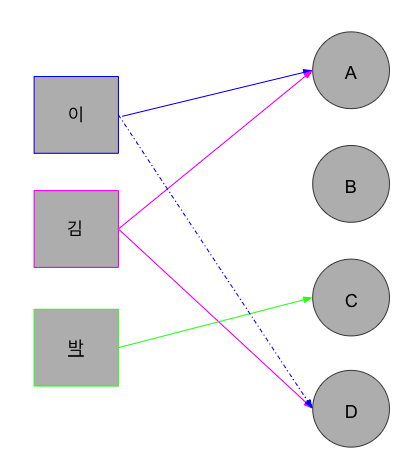

### 2) Collaborative Filtering(CF) - Memory Based
협업 필터링 중 메모리 기반, 최근접 이웃기반(Nearest Neighborhood Based)으로도 불리는 협업 필터링 방법입니다.

어떤 상품을 구매한 사람은 같은 상품을 구매한 사람과 비슷한 구매 의지가 있을 것이라는 아이디어.  
위 그림과 같이 상품 A를 구매한 사람 이씨에게 추천해 줄 다음 아이템을 찾을 때, 이씨와 같이 A를 구매한 김씨의 다른 구매 상품 D를 추천(파란색 점선)해주는 것과 같은 원리입니다.

<br>

기본적으로 CB와의 차이점은 User와 Item 간의 상호작용(구매여부, 조회여부) 행렬을 활용하여 아직 평가되지 않은 점수를 예측하거나, 볼지 안볼지(binary)를 결정하는 score를 예측하는 방식으로 진행됩니다.

이 안에서도 Item-based, User based로 나뉘게 됩니다.

#### * Memory Based Filtering특징

* CB보다도 구현이 간단합니다.
* CB보다도 성능도 안정적입니다.
* 아이템이나 유저가 늘어날 때 확장성이 떨어집니다.
* Sparse한 데이터일 경우 성능이 저하됩니다. 
  * sparse 한 경우는 사실 cold start와 비슷한 상황이라고도 볼 수 있습니다.
  * 너무 sparse한 경우, CB와의 하이브리드 추천을 이용해서 진행 할 수도 있습니다. 
  * Sparsity가 99.5%를 넘지 않도록 하는 것이 좋습니다.

  <br>

#### (1) User Based Filtering원리
두 유저가 얼마나 유사한 상품을 선호하는지를 찾아 추천해주는 방식입니다.  
특정 유저와 비슷한 유저가 있다면 그 유저가 좋아한 상품을 추천해줄 수 있습니다. 

||아이언맨1|어벤져스1|퍼스트어벤져|집으로|인셉션|
|:-:|:-:|:-:|:-:|:-:|:-:|
|User A|5|4.5|5|2|1|
|User B|4|5||1|2|
|User C|2|1|1|4|5|
|User D|3|3|3|3|3|

위와 같이 표가 있을 때, 우리는 User B는 퍼스트어벤져를 본 적이 없지만, 예측할 수 있습니다. 
한눈에 봐도 User A와 User B의 점수대를 보면 유사도가 높기 때문에 4~5점이 나올 것이라는 예측을 할 수 있습니다. 이와 같이 유저의 평점을 기반으로 다른 유저와의 유사도를 통해 '평점을 예측' 하는 것이 User Based 원리 입니다.


In [ ]:
#cf용 행렬 생성
df_cu = pd.DataFrame({'아이언맨1':[5.0,4,2,3],
                     '어벤져스1':[4.5,5,1,3],
                     '퍼스트어벤져':[5.0,'?',1.0,3.0],
                     '집으로':[2.0,1,4,3],
                     '인셉션':[1.0,2,5,3]}, index = ['A','B','C','D'])
df_cu

,아이언맨1,어벤져스1,퍼스트어벤져,집으로,인셉션
A,5.0,4.5,5.0,2.0,1.0
B,4.0,5.0,?,1.0,2.0
C,2.0,1.0,1.0,4.0,5.0
D,3.0,3.0,3.0,3.0,3.0


In [ ]:
# 퍼스트어벤져를 제외한 다른 영화를 벡터삼아 유사도를 구해보기
pd.DataFrame(cosine_similarity(df_cu[['아이언맨1','어벤져스1','집으로','인셉션']], df_cu[['아이언맨1','어벤져스1','집으로','인셉션']]))

,0,1,2,3
0,1.000000,0.967177,0.571986,0.881682
1,0.967177,1.000000,0.586957,0.884652
2,0.571986,0.586957,1.000000,0.884652
3,0.881682,0.884652,0.884652,1.000000



1. 유저와 아이템의 행렬을 확인
2. 유저의 벡터는 각 아이템에 대한 평점의 모음, 데이터 상에서는 5차원의 벡터로 표현됨
3. 유저의 편향(bias)을 해결하는 Deviation 파악: 평점을 주는 기준이 조금씩 다르기 때문에 이 점을 반영합니다.
  * $dev$평점 = $r(u,i)-\bar r_u$ = 특정 아이템 $i$에 대한 유저 $u$의 평점 - 유저 $u$의 평균 평점
3. 유사도를 구한 뒤 가중평균(Weighted Average)을 통해 평점 예측: $\hat r_{u,i} = \bar r_u + \frac {\sum_usim(B,u)\cdot (r_{u',i_퍼} - \bar r_{u',i})} {\sum_nsim(B,u)} = 대상유저평균평점 + \frac {\sum sim(대상유저, 다른 유저(들)) \cdot (다른 유저(들)의 아이템 i 평점 - 다른유저(들)평균 평점)}{\sum sim(대상유저, 다른 유저(들))}$
  * $u = B, u'= A, C, D$일때, $\hat r_{u,i_퍼}= B의평균평점 + \frac{sim(B,u') \cdot (u'의 퍼스트어벤져평점 - u'평균평점)}{sim(B,u')} $

  * $\hat r_{u',i_퍼}= \frac{4+5+1+2}{4}+ \frac {(0.967 \cdot (5-3.5)) +(0.587 \cdot (1 - 2.6)) + (0.885 \cdot (3-3))}{(0.967+0.587+0.885)} =3+ \frac {1.4505 +(-0.9392) +0}{2.439}= 3.21$

<br>

---


#### (2) Item Based Filtering원리
아이템의 측면에서 유저의 평점을 예측한다는 개념으로 보면됩니다. 아이템 선호도를 바탕으로 연관성이 높은 다른 아이템을 추천합니다. 

||아이언맨1|어벤져스1|퍼스트어벤져|집으로|인셉션|
|:-:|:-:|:-:|:-:|:-:|:-:|
|User A|5|4.5|5|2|1|
|User B|4|5||1|2|
|User C|2|1|1|4|5|
|User D|3|3|3|3|3|

직관적으로 스타워츠와 아이언맨, 어벤져스, 퍼스트어벤져의 유사도가 높고 집으로, 인셉션은 낮습니다. 
이것을 직접 한번 유사도를 구해서 판단해봅니다. 


In [ ]:
# 설명의 편의를 위해 아이템, 유저 방향을 바꾸기
df_ci = pd.DataFrame({'A':[5,4.5,5,2,1], 'B':[4.0,5.0,'?',1.0,2.0],'C':[2.0,1,1,4,5], 'D':[3.0,3,3,3,3]}, index = ['아이언맨1','어벤져스1','퍼스트어벤져','집으로','인셉션'])
df_ci

,A,B,C,D
아이언맨1,5.0,4.0,2.0,3.0
어벤져스1,4.5,5.0,1.0,3.0
퍼스트어벤져,5.0,?,1.0,3.0
집으로,2.0,1.0,4.0,3.0
인셉션,1.0,2.0,5.0,3.0


In [ ]:
# 아이템 벡터에서 B를 뺀 값들로 유사도를 책점
pd.DataFrame(cosine_similarity(df_ci[['A','C','D']], df_ci[['A','C','D']]))

,0,1,2,3,4
0,1.000000,0.988076,0.987135,0.813342,0.658090
1,0.988076,1.000000,0.998819,0.742781,0.568558
2,0.987135,0.998819,1.000000,0.721930,0.542857
3,0.813342,0.742781,0.721930,1.000000,0.973035
4,0.658090,0.568558,0.542857,0.973035,1.000000


위와 같이 아이템 별 유사도를 확인해보면 2번 index의 '퍼스트어벤져' 아이템과 가장 유사한 것은 0번'아이언맨1'과 1번 '어벤져스1'이 됩니다.

1. 유저 기반과 동일하게 행렬 확인  
2. 각 아이템의 벡터는 각 유저들의 평점 리스트. 데이터 상에선 4차원(네 개의 영화)의 벡터로 표현됨
3. 유저 기반과 마찬가지로 아이템도 Deviation을 적용합니다.
4. 아이언맨1(0.987), 어벤져스1(0.999)가 유사도가 높아서 이 두가지를 바탕으로 예측을 해본다면(K= 2)
  * 일반 평균: $\frac {0.987\cdot 4 + 0.999 \cdot 5}{0.987+0.999} = 4.5$
  * 가중 평균: $3+\frac {0.987\cdot (4-3.5) + 0.999 \cdot (5-3.38)}{0.987+0.999} = 3 + \frac {0.49 + 1.62}{1.99} = 4.06$


#### (3) K - Nearest Neighbors Collaborative Filtering

아이템 i에 대판 평점 예측을 위해 아이템 i에 대해 평가한 유저($\Omega_i$)의 데이터를 사용해야 한다. 
* KNN을 이용: 모든 유저활용 연산이 많고, 성능은 떨어지게 됨
  * 그렇기 떄문에 $\Omega_i$에 속한 User u와 가장 유사한 K명의 유저를 이용해 평점을 예측하는 것 (KNN)
  * 스타워즈를 본 사람 중에서 가장 유사한 사람을 25명 뽑아서 그 사람들의 가중평균을 이용한다.
  * 일반적으로 K는 25~50을 뽑아서 진행

<br>

### 2) Collaborative Filtering(CF) - Latent Factor Based
협업 필터링 중 잠재요인, 모델(Model Based)으로도 불리는 협업 필터링 방법입니다.

기본적으로 행렬 분해 개념을 활용해서 '머신러닝' 모델을 활용하는 방법으로 현재에도 가장 많이 쓰이는 기술입니다.

<br>

이 안에서도 Item-based, User based로 나뉘게 됩니다.

#### * Model Based Filtering 특징

* Parametric Machine Learning을 사용합니다.
  * 여기서의 Parameter는 Hyper Parameter가 아니므로, 유저가 조정하는것이 아니며, 개수를 정할 수는 있습니다.
  * 주어진 데이터를 사용해 모델 학습
  * 데이터 정보가 파라미터 형태로 모델에 압축
  * 모델의 파라미터는 데이터 패턴을 표현, 최적화 하여 업데이트 진행
  * 일반적으로 맨 처음의 파라미터는 평균 0, 표준편차가 1인 정규분포로 초기화 합니다. 

* 모델의 학습/서빙에서 이점을 가집니다.
  * 유저/아이템 데이터는 학습에만 사용. 학습된 모델은 압축된 형태로 저장됩니다.
  * 그렇기 때문에 이미 학습된 모델을 통해 추천 결과를 서빙해서 속도가 빠릅니다.
* Sparsity/Scalability 극복
  * KNN에 비해 sparse 한 데이터에서도 좋은 성능
  * 사용자, 아이템 개수가 늘어나도 좋은 추천 성능
* Overfitting 방지
  * 데이터의 '패턴'을 학습하는 것이지, 유사도를 바탕으로 데이터 자체를 기억해 두는 KNN과는 과적합 측면에서 차별점을 가집니다.
  * 위와같은 이유로 Cold Start 면에서도 강점을 가집니다.



#### Singular Vector Decomposition(SVD)
선형대수에서의 2차원 행렬을 분해하는 연산입니다.  
고유값 분해의 방식에서 정방행렬이 아니어도 행렬을 분해할 수 있는 특잇값 분해 방식을 이용했고, 해당 특이값을 통해 차원축소 역시도 가능합니다. 

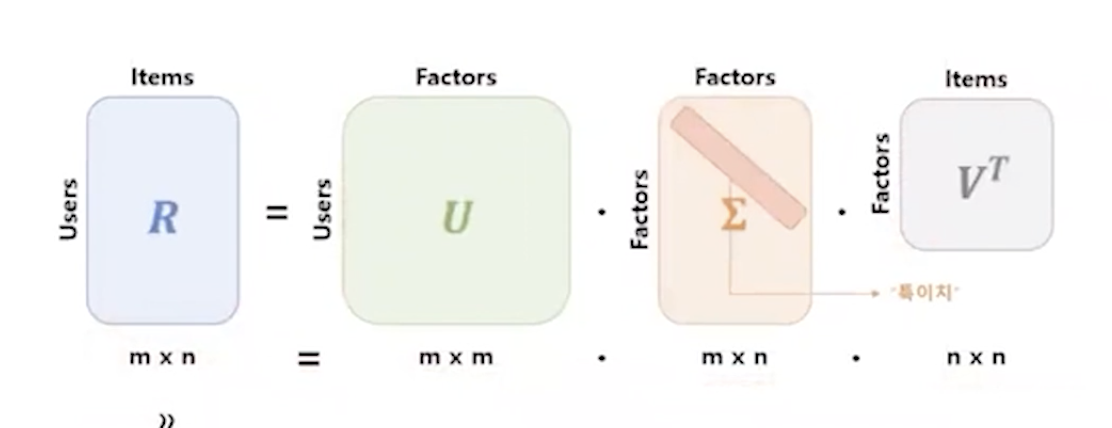



* Rating Matrix(user, item, rating matrix) R을 유저, 아이템의 latent factor를 포함하는 행렬로 분해해줍니다.
  * 1) 유저 latent factor matrix
  * 2) singular value diagonal matrix
  * 3) 아이템 latent factor matrix

* 선형 대수학의 차원 축소 기법 중 하나
  * 차원축소 = 임베딩 = latent vector로 볼 수 있다. 전체 item 몇백, 몇천만 건을 아주 적은 10개, 20개 차원으로 축소해서 계산할 수 있도록 하기 위함
  * PCA도 차원축소 기법 중 하나

* Netflix Prize 추천시스템 대회에서 단일 알고리즘 중 가장 좋은 성능을 보임
  * SVD 원리를 차용하되, 다양한 최적화 기법을 적용한 MF가 많음 (SGD, ALS, BPR)




##### *SVD 종류
* Full SVD: $R = U\sum V^T$
    * 전체 Singular Values 모두 사용
* Truncated SVD: $R = U\sum V^T \approx \hat U\sum_k \hat {V^T} = \hat R$
    * Singular Values 중 k개의 높은 중요도를 가진(0이상의 값을 가진) 것만으로 matrix를 축소하여 연산하는 방법
    * 이후 만들어진 세 개의 차원 축소된 행렬을 곱해줌으로써 $\hat R$을 만들어 내어 꽉 차있는 rating matrix로 복원한다
  

##### *전통 SVD의 문제점
* 분해하려는 행렬이 sparse하면 정의되지 않음
  * 실제 SVD는 값이 모두 채워져 있어야 수행이 가능
* Imputation을 통해 0 또는 평균값을 넣고 진행해야 함 
  * computation cost가 높아짐
  * Imputation을 무작위로 넣기 때문에 정확하지 않아질 수 있음
  * 행렬 entry가 적으면 과적합 되기 쉬움


#### Matrix Factorization (MF)


##### *MF의 구조
유저 매트릭스, 아이템 매트릭스 두 개로 이뤄졌습니다.
  * SVD로 분해된 행렬의 $\sum$을 유저 또는 아이템 행렬에 곱해 흡수한다.
  * 최종적으로 유저매트릭스 P x 아이템매트릭스 Q로 볼 수 있습니다.
  * $R \approx P * Q^T = \hat R$
    * $P → |U|*k$ 
    * $Q → |I|*k$
    * $\therefore |U| = 유저전체, |I| = 아이템 전체, k = 임의의 차원 수$ 
  * 평점 예측치: $\hat r_{u,i} = p_uq_i^T$

##### * MF의 학습
실제 평점 $R$과 예측 평점 $\hat R$의 오차가 최소화 되도록 P, Q의 파라미터 값을 학습하는 과정
  * 처음 파라미터는 모두 평균 0, 표준편차 1인 랜덤 값으로 초기화 진행 
  * $min_{P,Q}(\displaystyle\sum_{r_{u,i}}(r_{u,i}-p_uq_i^T)^2))$
  * 관측 된 $r_{u,i}$에 대한 학습을 통해 예측을 잘 할 수 있다면, 관측되지 않은 부분에 대해서도 예측을 잘 할 수 있을 것이라는 idea
  * 학습을 통해 파라미터를 업데이트 진행
  * 사실상 오차가 0이 되는 것은 학습데이터에 대한 과적합으로 볼 수 있음

##### *MF의 학습 파라미터 수
k개 차원으로 사용자, 아이템 두 행렬을 분해 했다면, P*k + k*Q

##### *MF의 최적화 기법
Objective Function(loss function)을 정의해야 함.
  * $min_{P,Q}\displaystyle\sum_{r_{u,i}}((r_{u,i}-p_uq_i^T)^2+\lambda(||p_u||^2_2+||q_i||^2_2))$
  * 위 식에서 $p_u$
는 유저 행렬의 유저 하나, $q_i$는 아이템 하나씩을 의미
  * 오른쪽 $\lambda$ term은 과적합을 방지하기 위한 L2 Regularization(정규화)
    * 일반적으로 학습데이터를 잘 맞추려다보니 $p_u, q_i$값 자체가 매우 커지는 경우가 있음
    * 이를 방지하기 위해 $\lambda$ 항을 넣어서 $p_u, q_i$의 절대값이 커질 때, 오차도 커지도록 넣음
    * $\lambda$ 크기에 따라 영향도가 달라지는데, 너무 커질수록 weight가 제대로 변하지 않아 underfitting 될 수 있음
    * (optional 정보) $L_1$ 정규화: $L(w) = \displaystyle\sum_{i=1}(h_w(x^{(i)})-y^{(i)})^2+\lambda\displaystyle\sum_j|w_j|$
      * 파라미터 자체의 '절대값'을 loss function에 넣어주는 것.
    * (optional 정보) $L_2$ 정규화: $L(x) = \displaystyle\sum_{i=1}(h_w(x^{(i)})-y^{(i)})^2 + \lambda\displaystyle\sum_jw_j^2$
      * 파라미터의 '제곱'을 loss function에 넣어주는 것
      * 보통 $L_2$를 많이 사용하며, 제곱의 합으로 이해하면 된다.


#### MF - SGD (Stochastic Gradient Descent)
확률적 경사하강 방법  
loss function이 작아지는 방향으로 파라미터를 업데이트 할 때, 알 수 없는 경사가 있을 수 있으므로 확률적으로 하나씩 하나씩 점진적으로 내려가는 방법

##### * Gradient Descent 진행 식
* Error
  * $e_{ui}=r_{ui}-p_uq_i^T$
* Gradient
  * $\frac {\partial L}{\partial p_u} = \frac {\partial(r_{ui}-p_uq_i^T)^2}{\partial p_u} + \frac {\partial\lambda||p_u||^2_2}{\partial p_u} = -2(r_{ui}-p_uq_i^T)q_i+2\lambda p_u = -2(e_{ui}q_i-\lambda p_u)$
    * 기존 LOSS에서 $p_u$에 대해 편미분을 진행해 필요없는 $q_i$항을 모두 지우고 계산하면 $-2(e_{ui}q_i-\lambda p_u)$가 남게 됨.
  * Gradient 반대로 $p_u, q_i$ 업데이트
    * $p_u ← p_u +\eta \cdot(e_{ui}q_i - \lambda p_u)$
    * $q_i ← q_i +\eta \cdot(e_{ui}p_u - \lambda q_i)$



#### MF - ALS(Alternative Least Square)
유저와 아이템 매트릭스를 번갈아가면서 업데이트 하는 방식. 두 매트릭스 중 하나를 상수로 둔 뒤 나머지 매트릭스를 업데이트 하는 방식

##### * ALS 특징
* 병렬처리가 가능
  * $p_u$나 $q_i$를 상수로 고정하면 loss function이 이차함수로 되어 convex 함수로 풀이가 가능.
  * $p_u$와 $q_i$를 따로따로 구해야 했던 SGD와 달리 한번에 상수로 놓고 계산이 가능
* Gradient를 구하기 위해 미분을 진행하지 않아도 행렬곱(matrix multiplication)만으로도 연산이 가능
  * 역행렬 연산이 가장 큰 컴퓨팅을 차지하지만, spark와 같은 분산처리 시스템에서는 이러한 연산을 빠르게 진행 가능
* 하기 수식을 통해 P,Q를 번갈아서 업데이트(Explicit Feedback일 경우)
  * $p_u = (Q^TQ +\lambda I)^{-1}Q^Tr_u$
  * $q_i = (P^TP +\lambda I)^{-1}P^Tr_i$
  * 병렬처리가 가능하다는 의미: SGD의 경우는 각 행렬 $P,Q$의 parameter를 하나하나 다 연산을 했어야 했다면, ALS는 행렬 전체 parameter를 한번에 행렬곱으로 구하기 때문에 병렬 처리가 됨 




#### Implicit Feedback의 처리
유저의 클릭, 조회 등으로 패턴을 파악해 추천을 해줘야하는데, 우연히 클릭한 것인지 알 수 없는 데이터

* Preference: 유저 u가 아이템 i를 선호하는지 여부를 binary로 표현
  * $f_{ui}$가 0보다 크면 1, 0일 경우 0으로 둡니다.
* Confidence: 유저 u가 아이템 i를 얼마나 선호하는지를 나타내는 increasing function
  * $\alpha$는 positive feedback과 negative feedback 간의 상대적 중요도를 조정하는 하이퍼 파라미터
  * $c_{ui} = 1 + \alpha \cdot r_{ui}$

* $min_{P,Q}\displaystyle\sum_{r_{ui}}c_{u,i}(f_{ui} - p_uq_i^T)^2 + \lambda(||p_u||^2_2 + ||q_i||^2_2)$
  * 이 경우 $f_{ui}=1$로 가정할 때, $c_{ui}$에 따라 달라집니다.
  * 유튜브 영상의 경우 오래봤으면 $c_{ui}$가 높고, 보자마자 화면을 넘겼으면 낮을 것입니다.
  * 하여 $c_{ui}$가 높은 경우는 오차에 더 민감하도록 하여 더 잘 학습할 수 있도록 하는것
  * 이커머스의 경우, 클릭하고 머문 시간으로 볼 수 있다. 체류 시간이 없을 경우는 $c_{ui}$를 이용하지 않고 진행합니다. 

* Confidence / Preference의 분리
  * 기존의 ALS term 중 맨 마지막에 평점데이터를 넣었던 것 대신, Confidence와 preference term을 넣어준다.
  * $p_u = (Q^TC^uQ + \lambda I)^{-1}Q^TC^uf_u$
  * $q_i = (P^TC^iP + \lambda I)^{-1}P^TC^if_i$



## 추천시스템의 평가
추천 시스템의 평가는 우리 사업의 앞으로의 가능성을 좌우할 중요한 알고리즘이기에 매우 중요하게 여겨집니다.   
우선 크게 오프라인과 온라인(비즈니스) 테스트 두 가지 분류를 할 수 있습니다.


#### 1) 오프라인 테스트

추천시스템 모델링이 되고 가장 먼저하는 테스트입니다.  
자체적인 테스트로 볼 수 있으며, 수집한 데이터를 바탕으로 모델 성능을 평가하는 것입니다.

* precision@K : K개를 추천했을 때의 정밀도를 측정하는 것
  * 예측한 상품 중 실제 구매한 상품 수 / 예측한 top K 상품 수

* recall@K : K개를 추천했을 때 재현율을 측정합니다. 
  * 예측한 상품 중 실제 구매한 상품 수 / 실제 구매한 상품 수

<br>


👁️ 아래 다른 오프라인 평가 지표들을 파악해봅시다.

* Mean Average Precision(MAP)

* Hit Rate

* NDCG

#### 2) 온라인 테스트 (A/B Test)
오프라인에서 검증된 모델을 실제 '비즈니스'관점에서 서빙하면서 검증하는 단계입니다.

대조군과 실험군의 성능을 동시에 평가하는 것이며, 위의 오프라인 평가지표와 달리 아래와 같이 비즈니스, 마케팅 적인 부분에서의 평가가 필요로 됩니다.

* 매출액
* 클릭수(CTR)
* 전환율(CVR)



### ALS의 활용

In [ ]:
import os
import pandas as pd
import seaborn as sns
import scipy
from scipy import sparse
import numpy as np
import random
from matplotlib import pyplot as plt
from datetime import datetime
from tqdm import tqdm
%matplotlib inline

from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/online_retail.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 로드
# file_path = '../data/online_retail.csv'
parse_date = lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M')
retail_df = pd.read_csv(file_path, encoding="utf-8", parse_dates = ['InvoiceDate'], date_parser = parse_date)

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# 사용자 아이디가 없는 데이터 제외
# quantity가 음수인 데이터 제외

cleaned_retail_df = retail_df[~(retail_df['CustomerID'].isnull()) & (retail_df['Quantity'] > 0)]

In [ ]:
# 필요한 필드만 추출
cleaned_retail_df['CustomerID'] = cleaned_retail_df.CustomerID.astype(int) 
cleaned_retail_df = cleaned_retail_df[['StockCode', 'Quantity', 'CustomerID', 'InvoiceDate']] 

In [ ]:
cleaned_retail_df

,StockCode,Quantity,CustomerID,InvoiceDate,ym
0,85123A,6,17850,2010-12-01 08:26:00,2010-12
1,71053,6,17850,2010-12-01 08:26:00,2010-12
2,84406B,8,17850,2010-12-01 08:26:00,2010-12
3,84029G,6,17850,2010-12-01 08:26:00,2010-12
4,84029E,6,17850,2010-12-01 08:26:00,2010-12
...,...,...,...,...,...
541904,22613,12,12680,2011-12-09 12:50:00,2011-12
541905,22899,6,12680,2011-12-09 12:50:00,2011-12
541906,23254,4,12680,2011-12-09 12:50:00,2011-12
541907,23255,4,12680,2011-12-09 12:50:00,2011-12


### train / test 데이터 나누기

- 보통 실습자료에서 train 데이터와 test 데이터는 전체 데이터를 기반으로 랜덤하게 나눈다.
- 하지만 실제로는 과거 데이터를 가지고 미래 데이터를 예측하기 때문에, 특정한 시간을 기준으로 전후 데이터를 train / test 데이터로 나눈다.
- 특히 커머스 데이터와 같은 경우, 같은 상품을 다시 구매할 수 있기 때문에 이미 구매한 상품을 다시 추천하기도 한다.

In [ ]:
# 연도와 월을 추출
cleaned_retail_df['ym'] = cleaned_retail_df['InvoiceDate'].apply(lambda x: str(x)[:7])

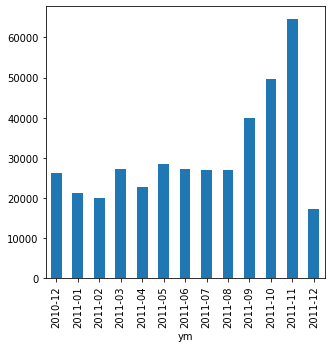

In [ ]:
cleaned_retail_df.groupby(['ym'])['StockCode'].count().plot.bar(figsize=(5,5))

In [ ]:
# 2011-10 까지의 데이터를 train 데이터로 사용하고, 2011-11 이후의 데이터의 test 데이터로 사용하자.
train_df = cleaned_retail_df[cleaned_retail_df['ym'] <= '2011-10']
test_df = cleaned_retail_df[cleaned_retail_df['ym'] > '2011-10']

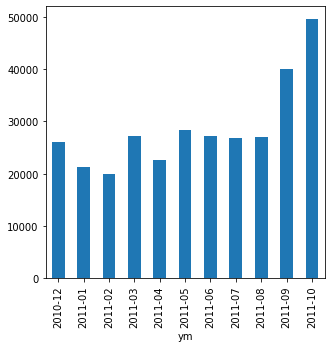

In [ ]:
# train 데이터는 2010-12 ~ 2011-10
train_df.groupby(['ym'])['StockCode'].count().plot.bar(figsize=(5,5))

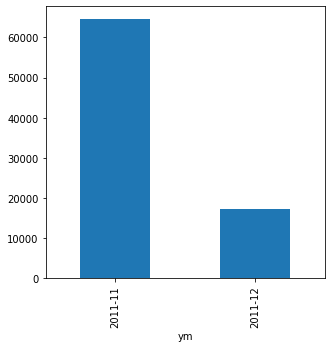

In [ ]:
# test 데이터는 2011-11 ~ 2011-12
test_df.groupby(['ym'])['StockCode'].count().plot.bar(figsize=(5,5))

In [ ]:
# 기간동안 구매한 사용자별로 구매한 아이템은 group by 해서 quantity를 구합니다

train_df = train_df.groupby(['CustomerID', 'StockCode']).sum().reset_index() # Group together
test_df = test_df.groupby(['CustomerID', 'StockCode']).sum().reset_index() # Group together

In [ ]:
# 사용자 id와 아이템 id를 category type으로 만들어줍니다

train_df['CustomerID'] = train_df['CustomerID'].astype("category")
train_df['StockCode'] = train_df['StockCode'].astype("category")
# 사용자, 아이템의 룩업테이블 생성
train_df['user_id'] = train_df['CustomerID'].cat.codes
train_df['item_id'] = train_df['StockCode'].cat.codes

In [ ]:
# 새로운 user_id => 기존 CustomerID
user_id_map = dict(enumerate(train_df['CustomerID'].cat.categories))
# 새로운 item_id => 기존 StockCode
item_id_map = dict(enumerate(train_df['StockCode'].cat.categories))
train_user_list = list(user_id_map.values())
train_item_list = list(item_id_map.values())

In [ ]:
print(user_id_map)
# item_id_map

{0: 12346, 1: 12347, 2: 12348, 3: 12350, 4: 12352, 5: 12353, 6: 12354, 7: 12355, 8: 12356, 9: 12358, 10: 12359, 11: 12360, 12: 12361, 13: 12362, 14: 12363, 15: 12364, 16: 12365, 17: 12370, 18: 12371, 19: 12372, 20: 12373, 21: 12375, 22: 12377, 23: 12378, 24: 12379, 25: 12380, 26: 12381, 27: 12383, 28: 12384, 29: 12386, 30: 12388, 31: 12390, 32: 12393, 33: 12394, 34: 12395, 35: 12397, 36: 12398, 37: 12399, 38: 12401, 39: 12402, 40: 12403, 41: 12405, 42: 12406, 43: 12407, 44: 12408, 45: 12409, 46: 12410, 47: 12412, 48: 12413, 49: 12414, 50: 12415, 51: 12417, 52: 12418, 53: 12420, 54: 12421, 55: 12422, 56: 12423, 57: 12424, 58: 12425, 59: 12426, 60: 12427, 61: 12428, 62: 12429, 63: 12430, 64: 12431, 65: 12432, 66: 12433, 67: 12434, 68: 12435, 69: 12436, 70: 12437, 71: 12438, 72: 12441, 73: 12444, 74: 12446, 75: 12447, 76: 12448, 77: 12449, 78: 12450, 79: 12451, 80: 12453, 81: 12454, 82: 12455, 83: 12456, 84: 12457, 85: 12458, 86: 12461, 87: 12462, 88: 12463, 89: 12464, 90: 12465, 91: 1246

In [ ]:
# 나중에 test 데이터를 가지고 유저별로 성능을 평가할 때 사용합니다

# 기존 CustomerID => 새로운 user_id
customer_id_map = dict()
# 기존 StockCode => 새로운 item_id
stock_code_map = dict()

for x, y in zip(user_id_map.keys(), user_id_map.values()) :
    customer_id_map[y] = x
    
for x, y in zip(item_id_map.keys(), item_id_map.values()) :
    stock_code_map[y] = x

In [ ]:
# customer_id_map
print(stock_code_map)

{'10002': 0, '10080': 1, '10120': 2, '10123C': 3, '10124A': 4, '10124G': 5, '10125': 6, '10133': 7, '10135': 8, '11001': 9, '15030': 10, '15034': 11, '15036': 12, '15039': 13, '15044A': 14, '15044B': 15, '15044C': 16, '15044D': 17, '15056BL': 18, '15056N': 19, '15056P': 20, '15058A': 21, '15058B': 22, '15058C': 23, '15060B': 24, '16008': 25, '16010': 26, '16011': 27, '16012': 28, '16014': 29, '16015': 30, '16016': 31, '16020C': 32, '16033': 33, '16043': 34, '16045': 35, '16046': 36, '16048': 37, '16049': 38, '16052': 39, '16054': 40, '16151A': 41, '16156L': 42, '16156S': 43, '16161G': 44, '16161M': 45, '16161P': 46, '16161U': 47, '16162L': 48, '16162M': 49, '16168M': 50, '16169E': 51, '16169K': 52, '16169M': 53, '16169N': 54, '16169P': 55, '16202A': 56, '16202B': 57, '16202E': 58, '16206B': 59, '16207A': 60, '16207B': 61, '16216': 62, '16218': 63, '16219': 64, '16225': 65, '16235': 66, '16236': 67, '16237': 68, '16238': 69, '16244B': 70, '16248B': 71, '16254': 72, '16258A': 73, '16259'

In [ ]:
# 유저가 아이템을 구매한 횟수를 r_ui로 사용합니다

sparse_user_item = sparse.csr_matrix((train_df['Quantity'].astype(float),
                                      (train_df['user_id'], train_df['item_id'])))

유저 - 아이템 행렬의 Sparsity를 확인해봅시다.

In [ ]:
# 유저 - 아이템 매트릭스의 가능한 모든 개수
matrix_size = sparse_user_item.shape[0]*sparse_user_item.shape[1] 
# 유저 - 아이템 entry가 실제로 존재한 개수
num_purchases = len(sparse_user_item.nonzero()[0]) 
sparsity = 100 * (1 - (num_purchases/matrix_size))

print(f'sparse 공간: {matrix_size}')
print(f'상호작용 공간: {num_purchases}')
print(f'sparsity: {sparsity}')

sparse 공간: 14358062
상호작용 공간: 221390
sparsity: 98.45807881314344


##### ALS 모델 학습 및 평가
- [ALS](https://implicit.readthedocs.io/en/latest/als.html) Docs를 참고할 수 있습니다.

In [ ]:
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.5 MB 426 kB/s 


In [ ]:
import implicit

# 모델 불러오기, factors = 차원수, regular term 및 반복횟수 설정
model = implicit.als.AlternatingLeastSquares(factors=20, regularization = 0.1, iterations = 100, use_gpu = False)

# alpha는 'Collaborative Filtering for Implicit Feedback Datasets' 논문에서 소개된 confidence 값
alpha = 1

model.fit(alpha * sparse_user_item)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
item_vecs = model.item_factors # Item Matrix: Q
user_vecs = model.user_factors # User Matrix: P
print(item_vecs.shape)
print(user_vecs.shape)

(3613, 20)
(3974, 20)


20

In [ ]:

[(item, score) for item, score in zip(model.recommend(0, sparse_user_item[0], 10)[0], model.recommend(0, sparse_user_item[0], 10)[1])]

[(1996, 1.7792861),
 (1994, 1.5796394),
 (1568, 1.3707229),
 (1799, 1.3214147),
 (2073, 1.3107749),
 (1800, 1.24433),
 (2123, 1.2319331),
 (1747, 1.2221599),
 (1999, 1.2199327),
 (1570, 1.217304)]

### Top N Recommendation
- Precision@K, Recall@K로 성능을 평가해보자

In [ ]:
k = 20

# training data에 user가 없는 경우엔 추천이 안되므로 인기도 기반 추천 리스트를 미리 만들어 놓는다.
popular_item_at_k = list(train_df.groupby('item_id')['Quantity'].sum().sort_values(ascending=False)[:k].index)

precisions = []
recalls = []

# 사용자 별로 Top N 추천을 하여 사용자 별 precision recall을 구한다.

cold_start = 0
user_grouped = test_df.groupby('CustomerID')
for customer_id, user_df in tqdm(user_grouped):
    
    # test 데이터에 존재하는 사용자가 이미 구매한 아이템 = 정답
    buy_items = [stock_code_map[stock_code] if stock_code in stock_code_map else stock_code \
                 for stock_code in user_df['StockCode'].unique()]
    
    if customer_id in customer_id_map:
        user_id = customer_id_map[customer_id]
        user_vector = model.user_factors[user_id]
        scores = item_vecs.dot(user_vector)
        top_k_item = np.argpartition(scores, -k)[-k:]

        # 모델에서 top k 아이템을 선정하는 함수를 이미 제공함
        # top_k_item = [item for item, _ in model1.recommend(user_id, sparse_user_item.T, k, filter_already_liked_items=False)]

    else:
        cold_start += 1
        top_k_item = popular_item_at_k
        
    intersect = set(buy_items).intersection(set(top_k_item))
    
    precision = len(intersect)/len(top_k_item)
    recall = len(intersect)/len(buy_items)
    
    precisions.append(precision)
    recalls.append(recall)
print('\n')
print('precision@k:', np.mean(np.asarray(precisions)))
print('recall@k:', np.mean(np.asarray(recalls)))


100%|██████████| 1909/1909 [00:00<00:00, 2221.42it/s]



precision@k: 0.11770560502881089
recall@k: 0.11740206490070891
